<a href="https://colab.research.google.com/github/Abdelaleam/DM-Apriori/blob/main/DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#Import Data
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
from functools import reduce
from itertools import combinations

!pip install openpyxl

In [31]:
file_path = 'D:/Downloads/DM-Apriori-main/DM-Apriori-main/Horizontal_Format.xlsx'
Data=pd.read_excel(file_path)
data = [set(str(row[1]).split(',')) for row in Data.itertuples(index=False)]

In [32]:
# print(data)

In [33]:
#Variables
min_support = 3
min_conf = 0.6

In [34]:
#Function to generate combinations of items for a given length
def generate_combinations(items, length):
    return list(combinations(items, length))
#Function to calculate support for a given itemset
def calculate_support(data, itemset):
    return sum(1 for transaction in data if all(item in transaction for item in itemset))
#Function to generate frequent itemsets for a given length
def generate_frequent_itemsets(data, items, min_support, length):
    frequent_itemsets = {}
    combinations_length = generate_combinations(items, length)

    for combination in combinations_length:
        support = calculate_support(data, combination)
        if support >= min_support:
            frequent_itemsets[frozenset(combination)] = support

    return frequent_itemsets


In [35]:
#Generate frequent itemsets for different lengths
items = set(item for transaction in data for item in transaction)
frequent_itemsets = {}
for length in range(1, len(items) + 1):
    frequent_itemsets.update(generate_frequent_itemsets(data, items, min_support, length))

In [36]:
#Display frequent itemsets and their support counts
print("\n Frequent Itemsets")
current_level = None  # Variable to track the current level

for itemset, support in frequent_itemsets.items():
    level = len(itemset)  # Determine the level of the itemset

    # Print header if the level has changed
    if level != current_level:
        print(f"\nLevel {level}:")
        current_level = level

    # Print itemset information
    print(f"Itemset: {set(itemset)}, Support: {support}")



 Frequent Itemsets

Level 1:
Itemset: {'K'}, Support: 5
Itemset: {'Y'}, Support: 3
Itemset: {'E'}, Support: 4
Itemset: {'O'}, Support: 3
Itemset: {'M'}, Support: 3

Level 2:
Itemset: {'K', 'Y'}, Support: 3
Itemset: {'K', 'E'}, Support: 4
Itemset: {'O', 'K'}, Support: 3
Itemset: {'M', 'K'}, Support: 3
Itemset: {'O', 'E'}, Support: 3

Level 3:
Itemset: {'O', 'K', 'E'}, Support: 3


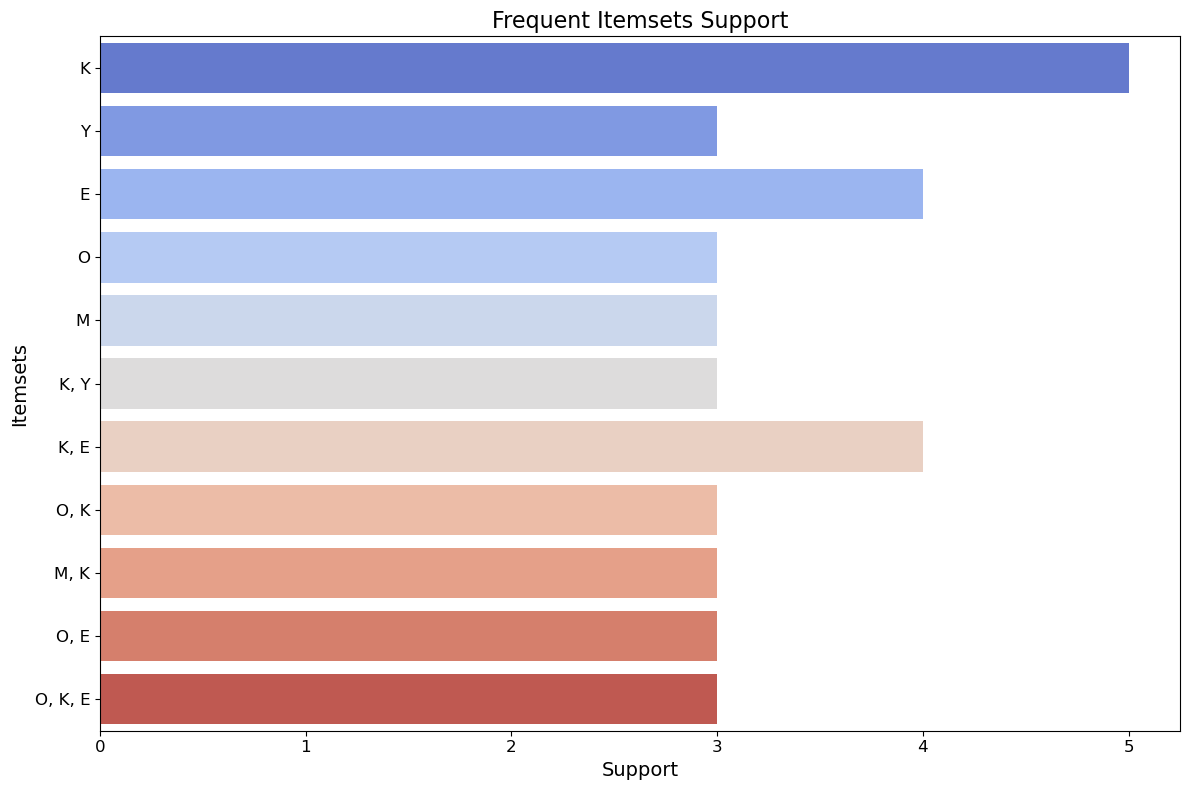

In [37]:
# Convert frequent itemsets and their support into a list of dictionaries
frequent_itemsets_list = [{'Itemset': ', '.join(itemset), 'Support': support} for itemset, support in frequent_itemsets.items()]

# Convert the list to a DataFrame using pandas
frequent_itemsets_df = pd.DataFrame(frequent_itemsets_list)

# Sort the data by support to make it easier to read
# frequent_itemsets_df = frequent_itemsets_df.sort_values(by='Support', ascending=False) دى اختيارى ع حسب احنا حابيين نعرضهم ازاى

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=frequent_itemsets_df, x='Support', y='Itemset', palette='coolwarm', hue='Itemset', dodge=False)

# Customize titles and axes
plt.title('Frequent Itemsets Support', fontsize=16)
plt.xlabel('Support', fontsize=14)
plt.ylabel('Itemsets', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


In [38]:
# Function to generate association rules
def generate_association_rules(frequent_itemsets, min_confidence):
    rules = []
    for itemset in frequent_itemsets.keys():
        if len(itemset) > 1:  # Only consider itemsets with more than one item
            for item in itemset:
                antecedent = itemset - frozenset([item])  # Left-hand side (A)
                consequent = frozenset([item])  # Right-hand side (B)
                
                if antecedent:  # Ensure antecedent is not empty
                    # Calculate support and confidence
                    support_antecedent = frequent_itemsets.get(antecedent, 0)
                    support_union = frequent_itemsets[itemset]
                    confidence = support_union / support_antecedent if support_antecedent > 0 else 0
                    
                    # Add rule if confidence meets the threshold
                    if confidence >= min_confidence:
                        rules.append((antecedent, consequent, confidence))
    return rules

# Generate association rules
association_rules = generate_association_rules(frequent_itemsets, min_conf)

# Display the rules
print("\nAssociation Rules:")
for antecedent, consequent, confidence in association_rules:
    print(f"Rule: {set(antecedent)} -> {set(consequent)}, Confidence: {confidence:.2f}")



Association Rules:
Rule: {'Y'} -> {'K'}, Confidence: 1.00
Rule: {'K'} -> {'Y'}, Confidence: 0.60
Rule: {'E'} -> {'K'}, Confidence: 1.00
Rule: {'K'} -> {'E'}, Confidence: 0.80
Rule: {'K'} -> {'O'}, Confidence: 0.60
Rule: {'O'} -> {'K'}, Confidence: 1.00
Rule: {'K'} -> {'M'}, Confidence: 0.60
Rule: {'M'} -> {'K'}, Confidence: 1.00
Rule: {'E'} -> {'O'}, Confidence: 0.75
Rule: {'O'} -> {'E'}, Confidence: 1.00
Rule: {'K', 'E'} -> {'O'}, Confidence: 0.75
Rule: {'O', 'E'} -> {'K'}, Confidence: 1.00
Rule: {'O', 'K'} -> {'E'}, Confidence: 1.00
